In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
cd /Users/14242/FFC_4

C:\Users\14242\FFC_4


### Load in *Files*

In [4]:
# nice and easy way of loading, just by giving it the paths and then iterating over all paths with the .npz
phases = ['/Users/14242/FFC_4/data/obs_042424/Phase1', '/Users/14242/FFC_4/data/obs_042424/Phase2',
          '/Users/14242/FFC_4/data/obs_042524']
files = [file for directory in phases for file in glob.glob(f'{directory}/*.npz')]
table = pd.read_csv('Leusch_Stuff/RA_Sorted.csv')

In [5]:
files

['/Users/14242/FFC_4/data/obs_042424/Phase1\\spec100_L180_B54.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase1\\spec101_L161_B51.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase1\\spec102_L175_B54.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase1\\spec103_L134_B37.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase1\\spec104_L138_B40.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase1\\spec105_L170_B54.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase1\\spec106_L143_B44.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase1\\spec107_L157_B51.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase1\\spec109_L166_B54.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase1\\spec10_L138_B23.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase1\\spec110_L147_B47.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase1\\spec111_L180_B57.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase1\\spec112_L161_B54.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase1\\spec113_L175_B57.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase1\\spec

In [7]:
noises = glob.glob('/Users/14242/FFC_4/data/obs_042424/Noise_Spectra/*.npz')

In [6]:
gain0_spec = np.load('/Users/14242/FFC_4/data/obs_042424/Phase1/spec3_L134_B20.npz')
gain0_noise = np.load('/Users/14242/FFC_4/data/obs_042424/Noise_Spectra/NoiseSpec3_L134_B20.npz')

gain1_spec = np.load('/Users/14242/FFC_4/data/obs_042424/Phase2/spec167_L115_B47.npz')
gain1_noise = np.load('/Users/14242/FFC_4/data/obs_042424/Noise_Spectra/NoiseSpec167_L115_B47.npz')

gain1_spec = np.load('/Users/14242/FFC_4/data/obs_042424/Phase2/spec320_L111_B20.npz')
gain2_noise = np.load('/Users/14242/FFC_4/data/obs_042424/Noise_Spectra/NoiseSpec320_L111_B20.npz')

In [7]:
# sort files by the original "galactic index" which ordered 
# the coordinates in galactic 
leusch_data = sorted(files, key=lambda x: np.load(x)['coords'][5])

In [10]:
#noises

In [9]:
leusch_data

['/Users/14242/FFC_4/data/obs_042424/Phase2\\spec292_L60_B20.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase2\\spec286_L60_B23.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase2\\spec277_L60_B27.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase2\\spec270_L60_B30.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase2\\spec261_L60_B34.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase2\\spec252_L60_B37.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase2\\spec244_L60_B40.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase2\\spec236_L60_B44.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase2\\spec229_L60_B47.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase2\\spec221_L60_B51.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase2\\spec210_L60_B54.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase2\\spec200_L60_B57.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase2\\spec295_L65_B20.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase2\\spec288_L65_B23.npz',
 '/Users/14242/FFC_4/data/obs_042424/Phase2\\spec281_L65_B27.n

### Load in *Data*

In [11]:
# make length object, empty arrays
len_testdata = len(leusch_data) 
pwr0 = [] 
pwr1 = []
unix = []
coordinates = []
alt_az = []
jd = []
galactic = []

# iterate through all 'testdata' object 
# grab info as well 
for n in range(len_testdata):
    test_dataFiles = np.load(leusch_data[n])
    # spectra 
    pwr0.append(test_dataFiles["data0"]) # Append data
    pwr1.append(test_dataFiles["data1"])
    unix.append(test_dataFiles['time'][()])
    coordinates.append(test_dataFiles['coords'])
    galactic.append([test_dataFiles['coords'][1], test_dataFiles['coords'][2]])
    jd.append(test_dataFiles['jd'])

In [12]:
coordinates

[array([292.        ,  60.        ,  20.        , 275.4099465 ,
         32.44704574,   0.        ]),
 array([286.        ,  60.        ,  23.4       , 271.57775805,
         33.55743569,   1.        ]),
 array([277.        ,  60.        ,  26.8       , 267.65132672,
         34.54681459,   2.        ]),
 array([270.        ,  60.        ,  30.2       , 263.63668267,
         35.40764193,   3.        ]),
 array([261.        ,  60.        ,  33.6       , 259.54231204,
         36.13293453,   4.        ]),
 array([252.        ,  60.        ,  37.        , 255.37913878,
         36.71647848,   5.        ]),
 array([244.        ,  60.        ,  40.4       , 251.16036252,
         37.15303984,   6.        ]),
 array([236.        ,  60.        ,  43.8       , 246.90114155,
         37.43855861,   7.        ]),
 array([229.        ,  60.        ,  47.2       , 242.61812746,
         37.5703098 ,   8.        ]),
 array([221.        ,  60.        ,  50.6       , 238.32887769,
         37.547016

### Fourier-Shift Data and Create Freqs Array

In [13]:
# shift all da spectra

for i in range(len(pwr0)): 
    pwr0[i] = np.fft.fftshift(pwr0[i])

for i in range(len(pwr1)):
    pwr1[i] = np.fft.fftshift(pwr1[i])

In [14]:
freqs = 1420 + np.fft.fftshift(np.fft.fftfreq(len(pwr0[i]), 1/3.2))

In [15]:
#divided = pwr010_pos/model_pos
#plt.plot(divided)

NameError: name 'pwr010_pos' is not defined

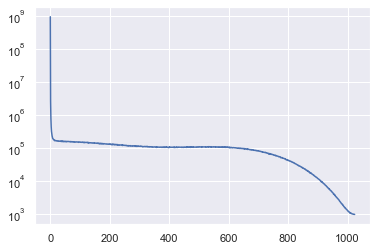

In [16]:
switch_set = pwr0[10][0:1025] 
switch_index = np.arange(0, 1025, 1)
switched = np.flip(switch_set)
plt.semilogy(switched) # NOTE: no hydrogen! because we took the mirror side of FFT and flipped it


(0.6, 2)

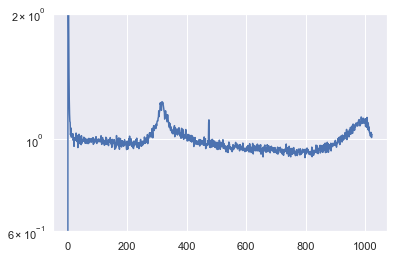

In [17]:
# now divide it, and plot
pwr0_flat_please = pwr0[10][1023:2048]/switched 
plt.semilogy(pwr0_flat_please)
plt.ylim(0.6, 2)

(0.6, 2)

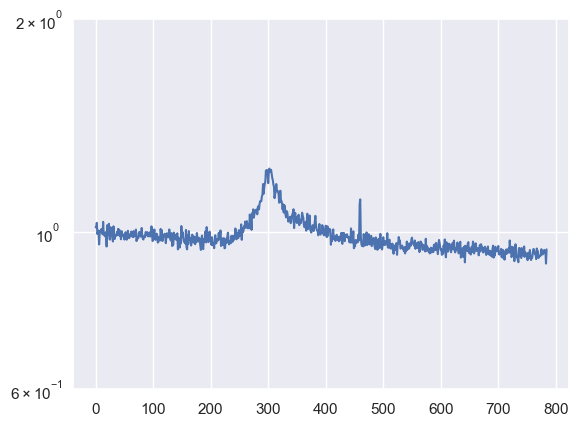

In [19]:
# that spike at 0 is ugly. let's exclude her from now on, and exclude the end bit too: 
pwr0_flatter = pwr0_flat_please[15:800]
plt.semilogy(pwr0_flatter)
plt.ylim(0.6, 2)

### Okay, now have it more flat, but can we get it even flatter? There's obviously still an underlying bias as we can see it trends downward... 
### But first let's do gain calibration, and then fit a line to remove it. It'll be easier when the numbers are bigger.  

In [18]:
def flip_divide(spectra):
    switch_set = spectra[0:1024] 
    switched = np.flip(switch_set)
    flatter = spectra[1024:2048]/switched
    chunked = flatter[5:600]
    return flatter, chunked, switched

In [19]:
from ugradio import doppler

No module named 'rtlsdr'


In [20]:
len(freqs)

2048

### Getting Temperature for Maps  

In [21]:
# this is a loop to do that S-line division to all of the power spectra

divided0 = [] 
chunked0 = []
freqs_chunked0 = []
for i in range(len(pwr0)):
    spectra = pwr0[i]
    switch_set = spectra[0:1024] 
    switched = np.flip(switch_set)
    flatter = spectra[1024:2048]/switched
    chunked = flatter[5:600]
    freq_divided = freqs[1024:2048]
    freq_chunked_axis = freq_divided[5:600]
    divided0.append(flatter)
    chunked0.append(chunked)
    freqs_chunked0.append(freq_chunked_axis)


divided1 = []
chunked1 = []
freqs_chunked1 = []
for i in range(len(pwr1)):
    spectra = pwr1[i]
    switch_set = spectra[0:1024] 
    switched = np.flip(switch_set)
    flatter = spectra[1024:2048]/switched
    chunked = flatter[50:600]
    freq_divided = freqs[1024:2048]
    freq_chunked_axis = freq_divided[5:600]
    divided1.append(flatter)
    chunked1.append(chunked)
    freqs_chunked1.append(freq_chunked_axis)

# in these loops, once we find gain, we can just multiply 
# the new T-line spectra (the "flatter" and "chunked") by that gain value

In [22]:

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from astropy.io import fits
import astropy
from scipy.signal import medfilt
from scipy.signal import savgol_filter
from scipy.signal import argrelmax
from scipy.stats import norm
from astropy import modeling
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy import interpolate
import astropy.time
import time
from matplotlib.patches import Rectangle
import scipy

In [23]:
ind = []
freq_peak = []
freq_divided = freqs[1024:2048]
freq_chunked = freq_divided[5:600]


for i in range(len(chunked0)):
    if 0 < i < 180 & 223 < i < 312: #Had to correspond with the corrdinates
        index = np.nanargmax(chunked0[i])
        ind.append(index)
        freq_peak.append(freq_chunked[index])
    else: 
        special_chunk = chunked0[i][200:450]
        freq_special = freq_chunked[200:450]
        index_special = np.nanargmax(special_chunk)
        ind.append(index_special)
        freq_peak.append(freq_special[index_special])

In [24]:
freq_arr = np.array(freq_peak)

In [25]:
freq_arr

array([1420.39375  , 1420.396875 , 1420.403125 , 1420.41875  ,
       1420.4125   , 1420.4484375, 1420.45625  , 1420.48125  ,
       1420.4609375, 1420.4765625, 1420.49375  , 1420.5      ,
       1420.3796875, 1420.39375  , 1420.4109375, 1420.4140625,
       1420.41875  , 1420.4421875, 1420.446875 , 1420.4515625,
       1420.4578125, 1420.4796875, 1420.4875   , 1420.496875 ,
       1420.375    , 1420.375    , 1420.390625 , 1420.415625 ,
       1420.421875 , 1420.4359375, 1420.4421875, 1420.4453125,
       1420.4546875, 1420.4703125, 1420.4796875, 1420.4984375,
       1420.371875 , 1420.38125  , 1420.3953125, 1420.4171875,
       1420.421875 , 1420.4390625, 1420.4453125, 1420.45625  ,
       1420.4625   , 1420.475    , 1420.4734375, 1420.4953125,
       1420.3703125, 1420.384375 , 1420.3953125, 1420.4140625,
       1420.43125  , 1420.440625 , 1420.446875 , 1420.4609375,
       1420.471875 , 1420.46875  , 1420.475    , 1420.4875   ,
       1420.3703125, 1420.3828125, 1420.428125 , 1420.4

In [27]:
doppler.get_projected_velocity?

In [40]:

c = 299792458

velocity_peak = []
v_uncorrected = []
velocity_reversed = []
freqs_dopp = []
velocity_peak_kms = []

for i in range(len(freq_arr)):
    RA = coordinates[i][3]
    DEC = coordinates[i][4]
    jd_i = jd[i]
    LSR_target_vel = doppler.get_projected_velocity(ra = RA, dec = DEC, jd = jd_i)
    nu = 1420
    delta_nu = freq_arr[i] - nu
    v = -(delta_nu / nu) * c
    dopp_v = v - LSR_target_vel
    freqs_corrected = ((c+(LSR_target_vel))/c)*freq_arr[i]
    freqs_dopp.append(freqs_corrected)
    v_uncorrected.append(v)
    velocity_peak.append(dopp_v)
    velocity_peak_kms.append(dopp_v/1000) 
    velocity_reversed.append(dopp_v * (-1))
    

In [41]:
dopp_v*(-1)

87361.34770598693

In [42]:
velocity_reversed

[97899.18642774508,
 97304.10526066736,
 97322.05828070757,
 99275.28034627406,
 96571.65230876498,
 102740.81062838632,
 102942.37367743086,
 106748.60529530309,
 100969.42445432545,
 102764.17942641846,
 104881.51732632432,
 104685.87976662199,
 93753.29141915699,
 95495.3530082489,
 97853.0552507724,
 97203.19031831977,
 96848.32937791722,
 100420.89985665999,
 100009.29464723721,
 99576.99278696103,
 99459.175432252,
 102629.39450470137,
 102826.20333527005,
 103351.4875005226,
 91466.6971051493,
 90271.23419038975,
 92333.30789276144,
 96341.20220339298,
 96359.16323895325,
 97999.63619747313,
 97969.08478342547,
 97262.25178389529,
 97862.36156581774,
 99774.81767782879,
 100365.94905324507,
 102937.9576253023,
 89399.66586891135,
 90216.27562416386,
 91986.81400225696,
 95377.30272460832,
 95111.68384213845,
 97463.2821862963,
 97488.75423034937,
 98490.79840714701,
 98494.20008566439,
 99814.10106245181,
 98165.66642568856,
 101470.81889898542,
 87560.71044721802,
 89401.627019

In [43]:
velocity_peak

[-97899.18642774508,
 -97304.10526066736,
 -97322.05828070757,
 -99275.28034627406,
 -96571.65230876498,
 -102740.81062838632,
 -102942.37367743086,
 -106748.60529530309,
 -100969.42445432545,
 -102764.17942641846,
 -104881.51732632432,
 -104685.87976662199,
 -93753.29141915699,
 -95495.3530082489,
 -97853.0552507724,
 -97203.19031831977,
 -96848.32937791722,
 -100420.89985665999,
 -100009.29464723721,
 -99576.99278696103,
 -99459.175432252,
 -102629.39450470137,
 -102826.20333527005,
 -103351.4875005226,
 -91466.6971051493,
 -90271.23419038975,
 -92333.30789276144,
 -96341.20220339298,
 -96359.16323895325,
 -97999.63619747313,
 -97969.08478342547,
 -97262.25178389529,
 -97862.36156581774,
 -99774.81767782879,
 -100365.94905324507,
 -102937.9576253023,
 -89399.66586891135,
 -90216.27562416386,
 -91986.81400225696,
 -95377.30272460832,
 -95111.68384213845,
 -97463.2821862963,
 -97488.75423034937,
 -98490.79840714701,
 -98494.20008566439,
 -99814.10106245181,
 -98165.66642568856,
 -10147

In [44]:
min(velocity_peak)

-140631.80304013676

In [45]:
max(velocity_peak)

-47575.37760391194

In [46]:
max(velocity_peak)

-47575.37760391194

In [47]:
neg_velocities = []
pos_velocities = []

for i in range(len(velocity_peak)):
    if velocity_peak[i] < 0: 
        neg_velocities.append(velocity_peak[i])
    else: 
        pos_velocities.append(velocity_peak[i])
        


In [48]:
len(neg_velocities)

313

In [49]:
len(pos_velocities)            

0

In [50]:
L_array2 = np.linspace(60, 180, 30)
B_array2 = np.linspace(20, 60, 14)

ll2, bb2 = np.meshgrid(L_array2, B_array2)


lb_val2  = []
indexes2 = []


for i in range(len(ll2[:,0])):
    for j in range(len(bb2[0,:])):
        
        #HOLDING THE ROW INDEX
        row = i
        #HOLDS THE COLUMN INDEX
        column = j
        
        #HOLDS THE INDEX IN A LIST
        index = [i,j]
        
        #APPENDING THE VALUE FOR LL AND BB INTO THE [L,B] GALACTIC COORDINATES
        lb_val2.append([ll2[i,j], bb2[i,j]])
        indexes2.append(index)

#MAKING A MATRIX
matrix2 = np.empty((14, 30, 1))
matrix2[:] = np.nan

#r_img = img[:,:,0]
#g_img = img[:,:,1]
#b_img = img[:,:,2]

l_tolerance = 5
b_tolerance = 4

for i in range(len(velocity_peak)):
    
    l = float(galactic[i][0])
    b = float(galactic[i][1])

    for m in range(len(lb_val2)):
        
        if np.isclose(l, lb_val2[m][0], atol=l_tolerance) and np.isclose(b, lb_val2[m][1], atol=b_tolerance):
            #GETS THE INDEXES
            row_index = indexes2[m][0]
            column_index = indexes2[m][1]

        #GETTING THE CORRESPONDING VELOCITY
            dop = velocity_reversed[i]

            #if dop > 20000: 
            matrix2[row_index, column_index,0] = dop


In [51]:
L_array = np.arange(60, 180, 4)
B_array = np.arange(20, 60, 3)

In [52]:
ll, bb = np.meshgrid(L_array, B_array)
print('row: ', len(bb[:,0]))
print('col: ', len(bb[0,:]))

row:  14
col:  30


In [53]:
ll, bb

(array([[ 60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108,
         112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160,
         164, 168, 172, 176],
        [ 60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108,
         112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160,
         164, 168, 172, 176],
        [ 60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108,
         112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160,
         164, 168, 172, 176],
        [ 60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108,
         112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160,
         164, 168, 172, 176],
        [ 60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108,
         112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160,
         164, 168, 172, 176],
        [ 60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108,
         112, 116, 120, 124, 128, 13

In [54]:
'''
• lb_val : holds our galactic coordinates
• indexes: where the index is located in our meshgrid array
'''
lb_val  = []
indexes = []


for i in range(len(ll[:,0])):
    for j in range(len(bb[0,:])):
        
        #HOLDING THE ROW INDEX
        row = i
        #HOLDS THE COLUMN INDEX
        column = j
        
        #HOLDS THE INDEX IN A LIST
        index = [i,j]
        
        #APPENDING THE VALUE FOR LL AND BB INTO THE [L,B] GALACTIC COORDINATES
        lb_val.append([ll[i,j], bb[i,j]])
        indexes.append(index)

        

In [55]:
float(2.4)

2.4

In [56]:
#MAKING A MATRIX
matrix = np.empty((14, 30, 1))
matrix[:] = np.nan

#r_img = img[:,:,0]
#g_img = img[:,:,1]
#b_img = img[:,:,2]

N = 0

l_tolerance = 5.6
b_tolerance = 2.7

for i in range(len(velocity_peak)):
    
    l = float(galactic[i][0])
    b = float(galactic[i][1])

    for m in range(len(lb_val)):
        def find_nearest(array, value):
            array = np.asarray(array)
            idx = (np.abs(array - value)).argmin()
            return idx
        
        if np.isclose(l, lb_val[m][0], atol=l_tolerance) and np.isclose(b, lb_val[m][1], atol=b_tolerance):
            #GETS THE INDEXES
            row_index = indexes[m][0]
            column_index = indexes[m][1]

        #GETTING THE CORRESPONDING VELOCITY
            dop = velocity_peak_kms[i]

            #if dop > 20000: 
            matrix[row_index, column_index,0] = dop
            #else: 
             #   matrix[row_index, column_index, 0] = np.nan

In [57]:
matrix

array([[[ -93.75329142],
        [ -91.46669711],
        [ -91.46669711],
        [ -89.39966587],
        [ -87.56071045],
        [ -85.95954836],
        [ -86.58613866],
        [ -88.13152955],
        [ -87.63798884],
        [ -91.05520154],
        [ -91.05520154],
        [ -76.29298377],
        [ -76.68134934],
        [ -73.75964497],
        [ -74.46754894],
        [ -74.46754894],
        [ -74.46754894],
        [ -62.47599884],
        [ -62.47599884],
        [ -68.56548506],
        [ -79.99525138],
        [ -70.71584873],
        [ -52.61436061],
        [ -74.85265002],
        [ -61.8984763 ],
        [ -61.8984763 ],
        [ -87.3235329 ],
        [ -74.27587371],
        [ -74.88265398],
        [ -73.64719688]],

       [[ -95.49535301],
        [ -90.27123419],
        [ -90.27123419],
        [ -90.21627562],
        [ -89.40162702],
        [ -87.50778116],
        [ -92.13167976],
        [-128.35455978],
        [ -88.31760896],
        [ -90.7883375 ]

C:\Users\14242\AppData\Local\Temp\ipykernel_15256\2988987263.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


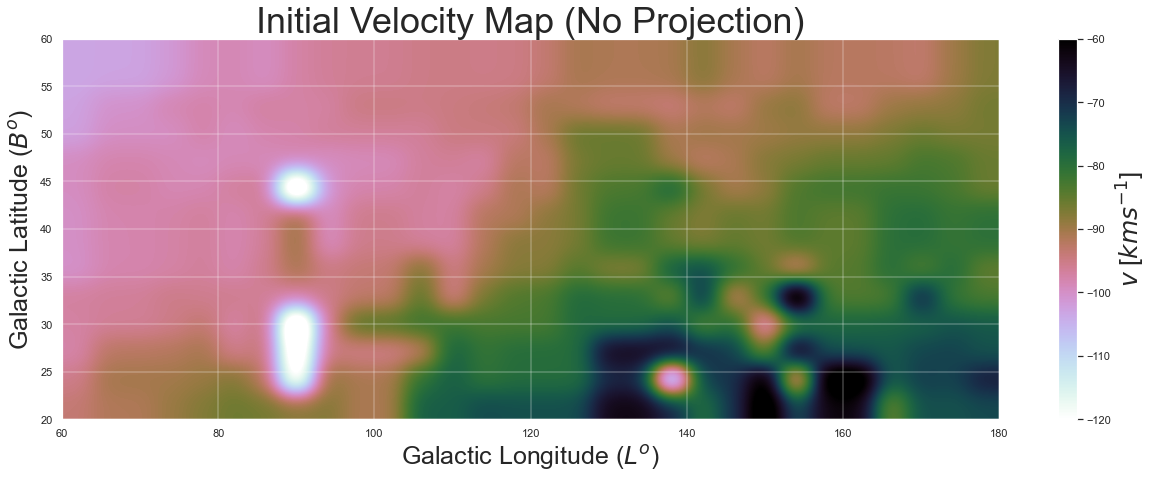

In [58]:
# colormaps that look good
plt.figure(figsize = (21, 7))
plt.imshow(matrix, cmap = 'cubehelix_r', interpolation= 'gaussian', 
           aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], 
           vmin=-120, vmax = -60)
cbar = plt.colorbar()
cbar.set_label(r'$v$ [$kms^{-1}$]', rotation=90, fontsize = 25)
plt.xlabel('Galactic Longitude ($L^{o}$)', fontsize = 25)
plt.ylabel('Galactic Latitude ($B^{o}$)', fontsize = 25)
plt.title('Initial Velocity Map (No Projection)', fontsize=36)
plt.grid(True, lw=0.4, which = 'major')



C:\Users\14242\AppData\Local\Temp\ipykernel_15256\396345451.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


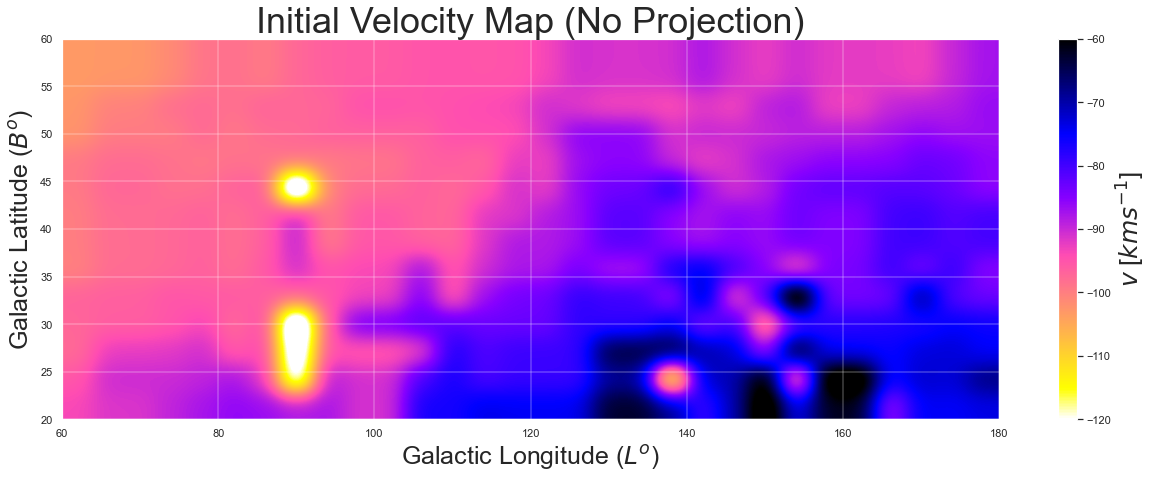

In [59]:
# colormaps that look good
plt.figure(figsize = (21, 7))
plt.imshow(matrix, cmap = 'gnuplot2_r', interpolation= 'gaussian', 
           aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], 
           vmin=-120, vmax = -60)
cbar = plt.colorbar()
cbar.set_label(r'$v$ [$kms^{-1}$]', rotation=90, fontsize = 25)
plt.xlabel('Galactic Longitude ($L^{o}$)', fontsize = 25)
plt.ylabel('Galactic Latitude ($B^{o}$)', fontsize = 25)
plt.title('Initial Velocity Map (No Projection)', fontsize=36)
plt.grid(True, lw=0.4, which = 'major')

C:\Users\14242\AppData\Local\Temp\ipykernel_15256\1479383185.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


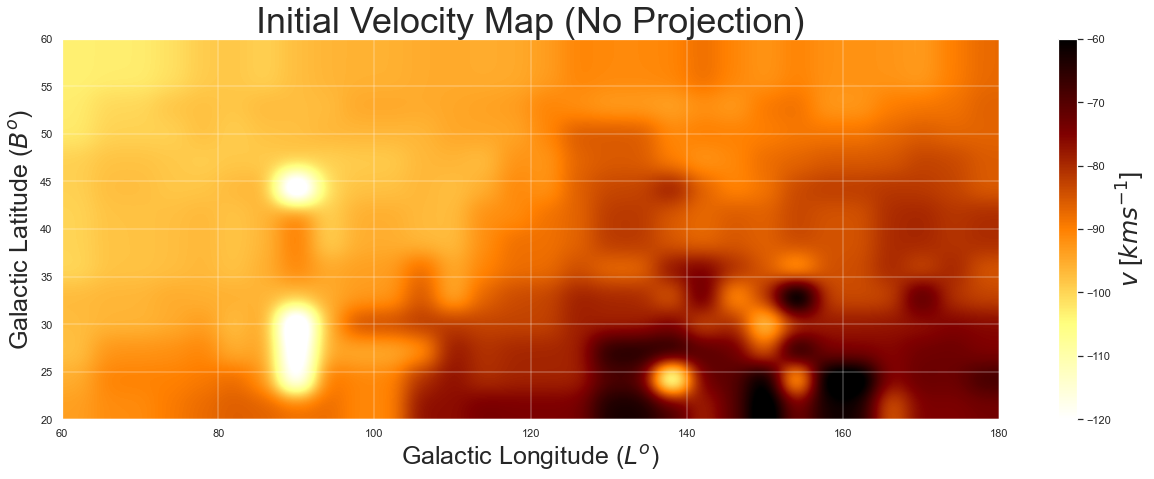

In [60]:
# colormaps that look good
plt.figure(figsize = (21, 7))
plt.imshow(matrix, cmap = 'afmhot_r', interpolation= 'gaussian', 
           aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], 
           vmin=-120, vmax = -60)
cbar = plt.colorbar()
cbar.set_label(r'$v$ [$kms^{-1}$]', rotation=90, fontsize = 25)
plt.xlabel('Galactic Longitude ($L^{o}$)', fontsize = 25)
plt.ylabel('Galactic Latitude ($B^{o}$)', fontsize = 25)
plt.title('Initial Velocity Map (No Projection)', fontsize=36)
plt.grid(True, lw=0.4, which = 'major')

C:\Users\14242\AppData\Local\Temp\ipykernel_15256\12407510.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


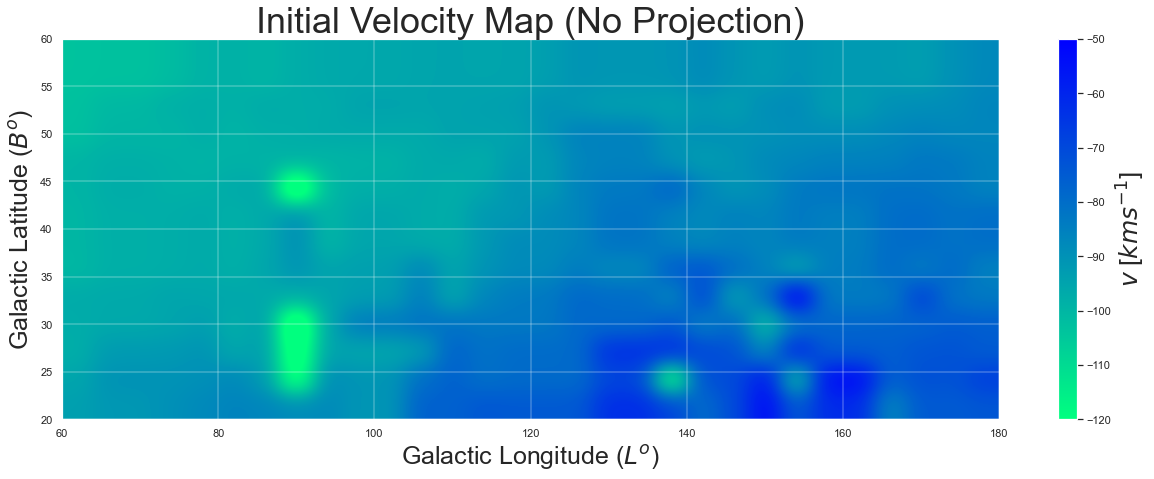

In [61]:
# colormaps that look good
plt.figure(figsize = (21, 7))
plt.imshow(matrix, cmap = 'winter_r', interpolation= 'gaussian', 
           aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], 
           vmin=-120, vmax = -50)
cbar = plt.colorbar()
cbar.set_label(r'$v$ [$kms^{-1}$]', rotation=90, fontsize = 25)
plt.xlabel('Galactic Longitude ($L^{o}$)', fontsize = 25)
plt.ylabel('Galactic Latitude ($B^{o}$)', fontsize = 25)
plt.title('Initial Velocity Map (No Projection)', fontsize=36)
plt.grid(True, lw=0.4, which = 'major')

C:\Users\14242\AppData\Local\Temp\ipykernel_15256\3154490792.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


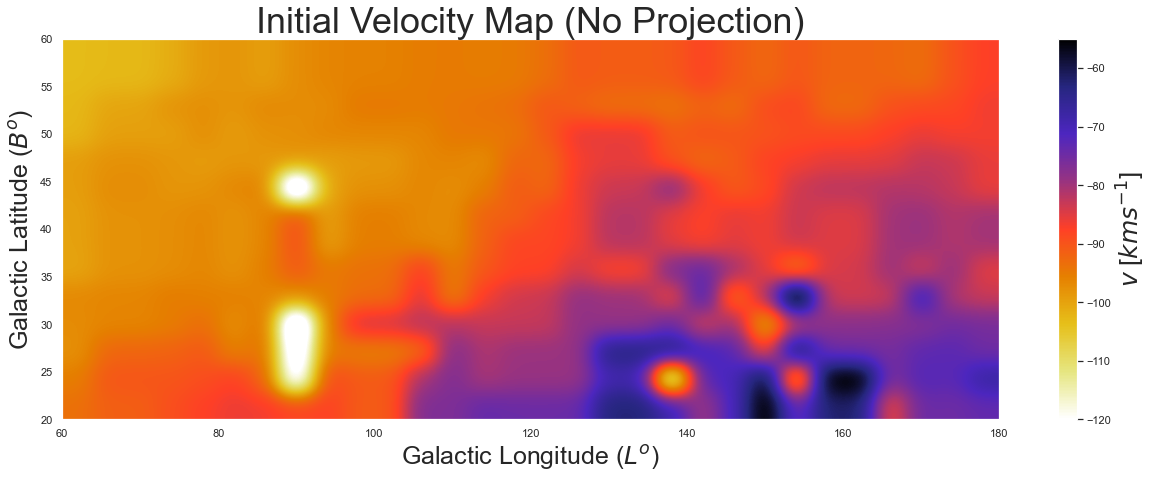

In [62]:
# colormaps that look good
plt.figure(figsize = (21, 7))
plt.imshow(matrix, cmap = 'CMRmap_r', interpolation= 'gaussian', 
           aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], 
           vmin=-120, vmax = -55)
cbar = plt.colorbar()
cbar.set_label(r'$v$ [$kms^{-1}$]', rotation=90, fontsize = 25)
plt.xlabel('Galactic Longitude ($L^{o}$)', fontsize = 25)
plt.ylabel('Galactic Latitude ($B^{o}$)', fontsize = 25)
plt.title('Initial Velocity Map (No Projection)', fontsize=36)
plt.grid(False)

In [45]:
plt.grid?

Signature: plt.grid(visible=None, which='major', axis='both', **kwargs)
Docstring:
Configure the grid lines.

Parameters
----------
visible : bool or None, optional
    Whether to show the grid lines.  If any *kwargs* are supplied, it
    is assumed you want the grid on and *visible* will be set to True.

    If *visible* is *None* and there are no *kwargs*, this toggles the
    visibility of the lines.

which : {'major', 'minor', 'both'}, optional
    The grid lines to apply the changes on.

axis : {'both', 'x', 'y'}, optional
    The axis to apply the changes on.

**kwargs : `~matplotlib.lines.Line2D` properties
    Define the line properties of the grid, e.g.::

        grid(color='r', linestyle='-', linewidth=2)

    Valid keyword arguments are:

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
    alpha: scalar or None
    animated: bool
   

C:\Users\14242\AppData\Local\Temp\ipykernel_15256\3473887068.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


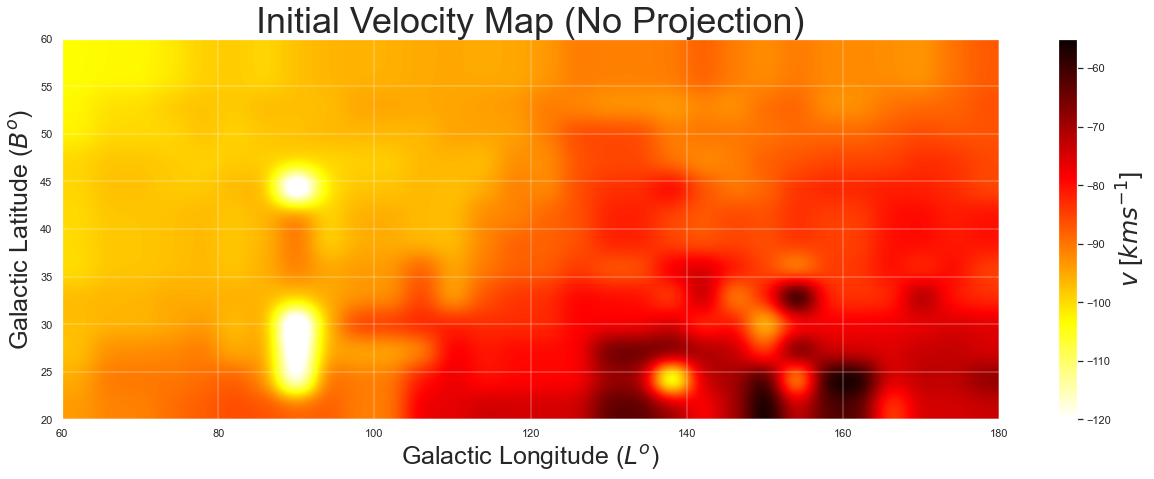

In [63]:
# colormaps that look good
plt.figure(figsize = (21, 7))
plt.imshow(matrix, cmap = 'hot_r', interpolation= 'gaussian', 
           aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], 
           vmin=-120, vmax = -55)
cbar = plt.colorbar()
cbar.set_label(r'$v$ [$kms^{-1}$]', rotation=90, fontsize = 25)
plt.xlabel('Galactic Longitude ($L^{o}$)', fontsize = 25)
plt.ylabel('Galactic Latitude ($B^{o}$)', fontsize = 25)
plt.title('Initial Velocity Map (No Projection)', fontsize=36)
plt.grid(True, lw=0.4, which = 'major')

plt.savefig('v_map_initial_long.png')

C:\Users\14242\AppData\Local\Temp\ipykernel_15256\1757708895.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


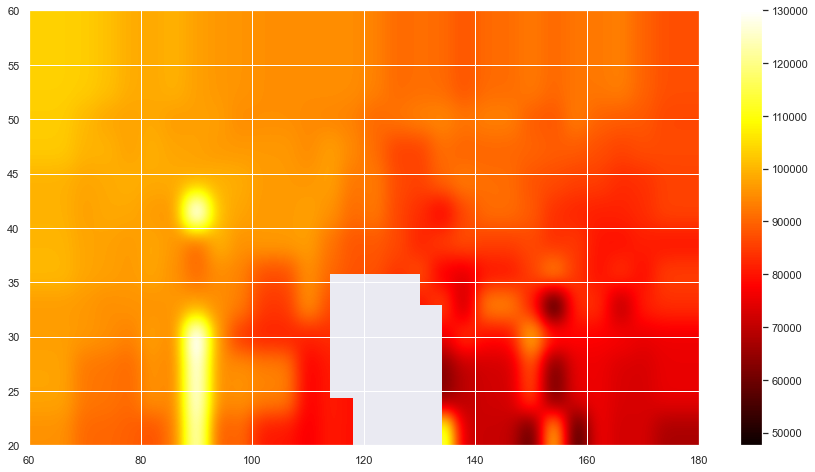

In [64]:
plt.figure(figsize = (15, 8))
plt.imshow(matrix2, cmap = 'hot', interpolation= 'gaussian', 
           aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], 
           vmin=min(velocity_reversed), vmax = 130000)
cbar = plt.colorbar()

C:\Users\14242\AppData\Local\Temp\ipykernel_15256\1281469889.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


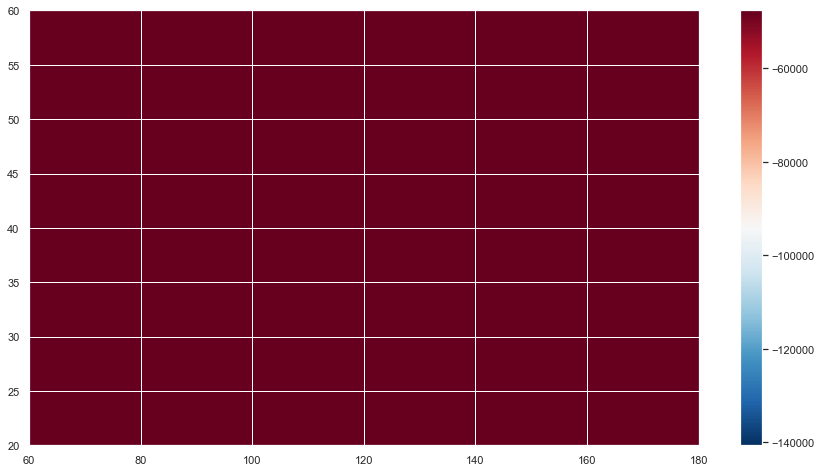

In [65]:
plt.figure(figsize = (15, 8))
plt.imshow(matrix, cmap = 'RdBu_r', interpolation= 'gaussian', aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], vmin=np.amin(velocity_peak), vmax=np.amax(velocity_peak))
cbar = plt.colorbar()

In [66]:
coordinates

[array([292.        ,  60.        ,  20.        , 275.4099465 ,
         32.44704574,   0.        ]),
 array([286.        ,  60.        ,  23.4       , 271.57775805,
         33.55743569,   1.        ]),
 array([277.        ,  60.        ,  26.8       , 267.65132672,
         34.54681459,   2.        ]),
 array([270.        ,  60.        ,  30.2       , 263.63668267,
         35.40764193,   3.        ]),
 array([261.        ,  60.        ,  33.6       , 259.54231204,
         36.13293453,   4.        ]),
 array([252.        ,  60.        ,  37.        , 255.37913878,
         36.71647848,   5.        ]),
 array([244.        ,  60.        ,  40.4       , 251.16036252,
         37.15303984,   6.        ]),
 array([236.        ,  60.        ,  43.8       , 246.90114155,
         37.43855861,   7.        ]),
 array([229.        ,  60.        ,  47.2       , 242.61812746,
         37.5703098 ,   8.        ]),
 array([221.        ,  60.        ,  50.6       , 238.32887769,
         37.547016

C:\Users\14242\AppData\Local\Temp\ipykernel_15256\267999859.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


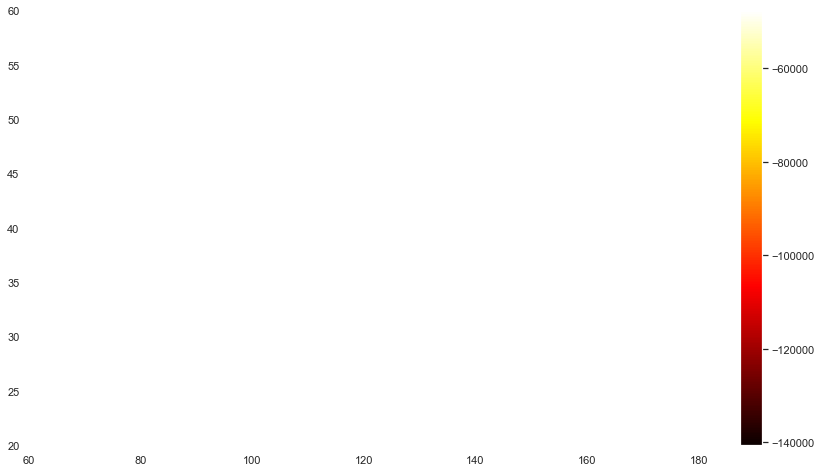

In [67]:
plt.figure(figsize = (15, 8))
plt.imshow(matrix, cmap = 'hot', interpolation= 'gaussian', aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], vmin=np.amin(velocity_peak), vmax=np.amax(velocity_peak))
cbar = plt.colorbar()

In [68]:
# for choosing nearest in better way (NOT FORMATTED YET)

# Matrix for the data
matrix1 = np.zeros((26, 31))  # Notice rows x cols are flipped for plotting with contourf

# Prepare coordinate pairs
coord = list(zip(longitudes, latitudes))
lb_val = list(zip(np.repeat(ref_longitudes, 26), np.tile(ref_latitudes, 31)))
indexes = list(zip(np.tile(col_indices, 31), np.repeat(row_indices, 26)))

# Efficient nearest index finding
def find_nearest_indices(lb_val, coord):
    lb_array = np.array(lb_val)
    coord_array = np.array(coord)
    nearest_indices = []
    for l, b in coord_array:
        distances = np.sqrt((lb_array[:, 0] - l)**2 + (lb_array[:, 1] - b)**2)
        nearest_indices.append(np.argmin(distances))
    return nearest_indices

nearest_indices = find_nearest_indices(lb_val, coord)

# Populate the matrix using precomputed nearest indices
for i, idx in enumerate(nearest_indices):
    matrix_index = indexes[idx]
    matrix1[matrix_index[1], matrix_index[0]] = velocities[i]  # Notice the reversed indexing for rows/cols

NameError: name 'longitudes' is not defined

In [239]:
import cartopy.crs as ccrs
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator, LongitudeLocator)

In [ ]:
NLON,NLAT = 1000, 500 # the number of pixels in longitude and latitude
xs,ys = np.indices((NLAT,NLON)) # get the array indices for each pixel
lats = (xs - NLAT/2) * 180 / NLAT # scale [0:NLAT) to [-90:90)
lons = (ys - NLON/2) * 360 / NLON # scale [0:NLON) to [-180:180)

plt.figure(figsize=(12,6))
plt.subplot(211)

plt.title('Cylindrical Projection (Longitude)')
plt.imshow(lons, origin='lower', extent=(-180,180,-90,90))
plt.grid()
plt.colorbar()

plt.subplot(212)
plt.title('Cylindrical Projection (Latitude)')
plt.imshow(lats, origin='lower', extent=(-180,180,-90,90))
plt.grid()
plt.colorbar()
plt.show()

In [240]:
Hvel = 1420.40575 * 0.21 / 1000

M=0
for i in velocity_peak:
    if i == 0:
        M+=1
    else:
        M+0
print(M)

0


In [242]:
Ns = []
for i in range(len(velocity_peak)):
    if velocity_peak[i] > 0:
        N = 1.8e18*0.003*velocity_peak[i]*1e5
        Ns.append(int(N))
    if velocity_peak[i] < 0:
        N = 1.8e18*0.003*np.abs(velocity_peak[i])*1e5 
        Ns.append(int(N))
    if velocity_peak[i] == 0:
        N = 1.8e18*0.003*Hvel*1e5
        Ns.append(int(N))

In [251]:
sns.kdeplot(velocity_peak, Ns)

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

In [245]:
sns.kdeplot?

Signature:
sns.kdeplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    fill=None,
    multiple='layer',
    common_norm=True,
    common_grid=False,
    cumulative=False,
    bw_method='scott',
    bw_adjust=1,
    warn_singular=True,
    log_scale=None,
    levels=10,
    thresh=0.05,
    gridsize=200,
    cut=3,
    clip=None,
    legend=True,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate distributions using kernel density estimation.

A kernel density estimate (KDE) plot is a method for visualizing the
distribution of observations in a dataset, analogous to a histogram. KDE
represents the data using a continuous probability density curve in one or
more dimensions.

The approach is explained further in the :ref:`user guide <tutorial_kde>`.

Relative to a histogram, KDE can produce a plot that is less cl

In [ ]:
matrix2 = np.zeros((31,26))


N = 0
for i in range(len(coord)):
    
    l = float(coord[i][0])
    b = float(coord[i][1])

    #col = np.linspace(0, 256, 257)
    #values = np.linspace(-501.82434399395436, -306.08842281913303, 257)

        #psueodo data im trying

        #for loop that ranges through the list of galactic values 
    for m in range(len(lb_val)):

            #if statement that checks to see if the galactic coordinates match up and appends
            #them to the proper index in the matrix
            
        def find_nearest(array, value):
            array = np.asarray(array)
            idx = (np.abs(array - value)).argmin()
            return idx
        
        if l == lb_val[m][0] and b == lb_val[m][1]:
            #print(N)
            #N+=1
                #print(l, b)
            #loop.append([l,b])
                #print(N)
                #N+=1
                #gets the matrix indices from indexes
            row_index = indexes[m][0]
            column_index = indexes[m][1]

                #appending a value to the matrix
            N = Ns[i]
            
            
                
            matrix2[row_index, column_index] = dop
   

In [ ]:
#MAKING A MATRIX
matrix = np.zeros((14, 30, 3), dtype = int)

#r_img = img[:,:,0]
#g_img = img[:,:,1]
#b_img = img[:,:,2]

N = 0


for i in range(len(velocity_peak)):
    
    l = float(galactic[i][0])
    b = float(galactic[i][1])

    for m in range(len(lb_val)):
        
        def find_nearest(array, value):
            array = np.asarray(array)
            idx = (np.abs(array - value)).argmin()
            return idx
        
        if l == lb_val[m][0] and b == lb_val[m][1]:
            #GETS THE INDEXES
            row_index = indexes[m][0]
            column_index = indexes[m][1]

        #GETTING THE CORRESPONDING VELOCITY
            dop = velocity_peak[i]

            #IF NEGATIVE GO TO THIS CODE BLOCK
            if dop < 0:
                #MAKING A LIST OF INTEGERS FOR COLOR MAPPING
                val = list(reversed(np.arange(0, 70, 1)))

                #THE VELOCITY MAP
                mapp = np.linspace(np.amin(velocity_peak), 0, 70)
                
                #GETTING INDEX TO WHERE THE MAPP AND VALUE ARE THE CLOSEST
                indx = find_nearest(mapp, dop)
                
                #GETTING THE CORRESPONDING VALUE FOR THE COLOR
                color = val[indx]
                
                #APPENDING THAT TO THE RED PART OF THE MATRIX
                matrix[row_index, column_index, 0] = int(color)

            #IF POSITIVE VELOCITY
            if dop > 0:
                
                #SAME DEAL AS BEFORE BUT NOW WITH POSITIVE MAPPING
                val = np.arange(0, 243, 1)
                mapp = np.linspace(0, np.amax(velocity_peak), 243)
                
                indx = find_nearest(mapp, dop)
                
                color = val[indx]

                matrix[row_index, column_index, 2] = int(color)   

In [181]:
from scipy.signal import find_peaks

In [232]:
# getting the peaks 
# NOTE: this will work the same once we get temperature
# in reality we will be passing calibrated T-line spectra through this
peaks_array = []
velocity_array = []
for i in range(len(chunked0)):
    peaks_indices, _ = find_peaks(chunked0[i]) # get indices of the peaks 
    peak_values_pre = [] # make empty array for storing peak values in nested loop
    for j in range(len(peaks_indices)):
        indiv_peaks = chunked0[i][peaks_indices[j]] # grab peak value at index of the individual spectra
        peak_values_pre.append(indiv_peaks) # append the peak value to a list of peak values for THAT spectra
    peak_max = max(peak_values_pre) # take the max of the peak values array, THAT'S the MAIN HI peak for that spectra
    peaks_array.append(peak_max)

In [255]:
print('min peak = ' + str(np.min(peaks_array)))
print('max peak = ' + str(np.max(peaks_array)))
peaks_array

min peak = 1.028433385651837
max peak = 8.851527661074917


[1.2423989087322675,
 1.1436405495278679,
 1.1194064198158558,
 1.123765981091869,
 1.1281185826581428,
 1.1212717447784728,
 1.15355323079509,
 1.1973870390832793,
 1.2363204436945407,
 1.2738565151918118,
 1.2293502596386296,
 1.3030010396870604,
 1.2206095704897753,
 1.1754201559598976,
 1.1697172797448177,
 1.1602763943370236,
 1.1303051009346947,
 1.1390249973096682,
 1.1649487668431964,
 1.1964218873231134,
 1.2371343844983356,
 1.3083555522578665,
 1.2797023635957547,
 1.269864034547211,
 1.1497973015910783,
 1.1495765330935692,
 1.138160841987473,
 1.1424181339688302,
 1.1473396771755424,
 1.1770035301995443,
 1.1671418788863956,
 1.203381260946015,
 1.2238389368352,
 1.2684127640532044,
 1.3079796117368927,
 1.271437807882889,
 1.2089076981432403,
 1.2279681217232319,
 1.19334598939091,
 1.231121115406884,
 1.2327288171202249,
 1.229625275843516,
 1.2287999253052786,
 1.2389184540412432,
 1.2163826132598081,
 1.2990549053413563,
 1.327162145700718,
 1.30687708184101,
 1.342357

### LOOK: THAT MAX VALUE IS OUR POISON. LET'S FIND HIM. HE'S LURKING

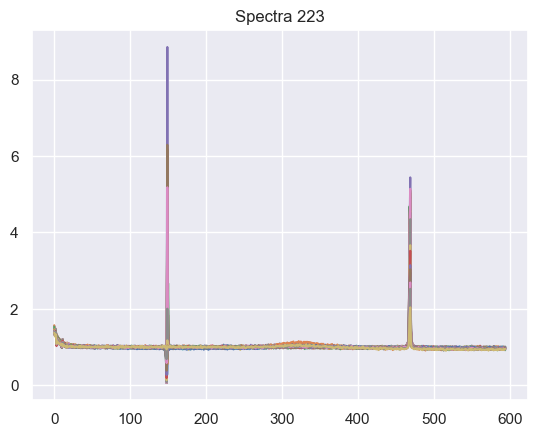

In [243]:
fucked_spectra = []
for i in range(len(peaks_array)):
    if peaks_array[i] > 2: 
        plt.plot(chunked0[i])
        plt.title(f'Spectra {i}'.format(str))
        fucked_spectra_index = int(i)
        fucked_spectra.append(fucked_spectra_index)

In [245]:
len(fucked_spectra)

39

### WAIT. MAYBE THOSE ARE NOT FUCKED SPECTRA. MAYBE THOSE ARE THE FUCKING CLOUDS!!!!!!!

OH wait. None of these have been doppler corrected. I hate myself LMAO 

Ok, I think those spectra are actually okay, and that they are the clouds. That is my hunch. Just need to do Doppler correction, but those have such a high amplitude with just an S-line (and they are not close enough to the indices where I took the noise spectra for that to be the cause) that it would suggest that those are areas where the HI is moving REALLY fast. 

I think. I don't know. 

Physics physics physics, science science science, blah blah blah... 

PRAYING FOR THIS CONCLUSION

In [256]:
fucked_spectra

[180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223]

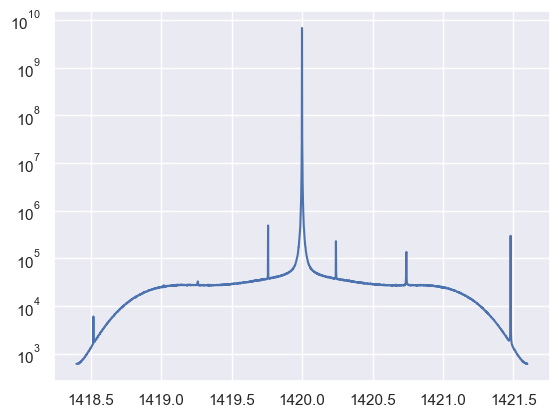

In [17]:
plt.semilogy(freqs, pwr0[193])

/var/folders/ky/hnfmqvvd74x03rjxm1q6hf580000gn/T/ipykernel_97797/2472432822.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


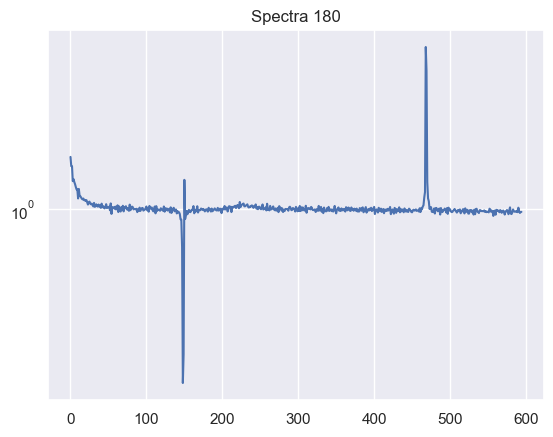

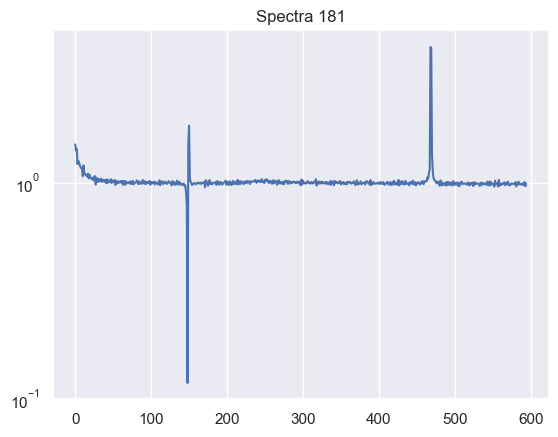

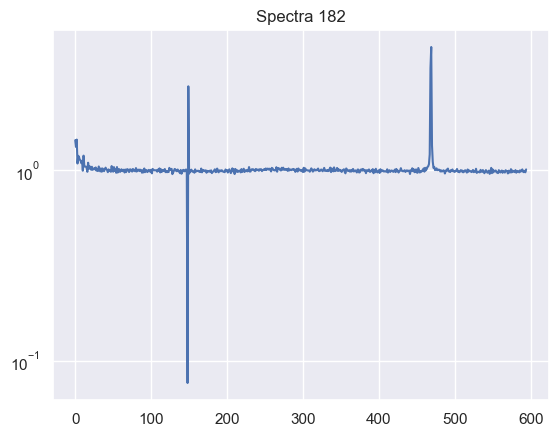

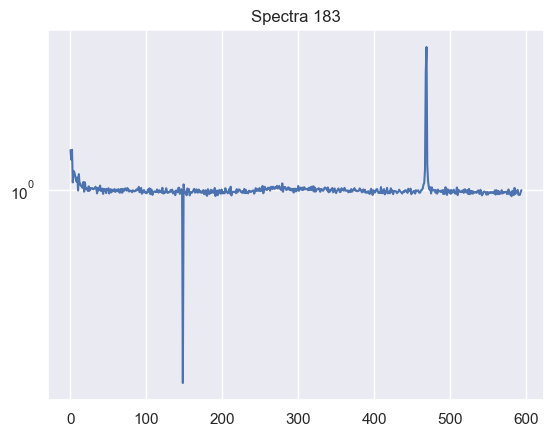

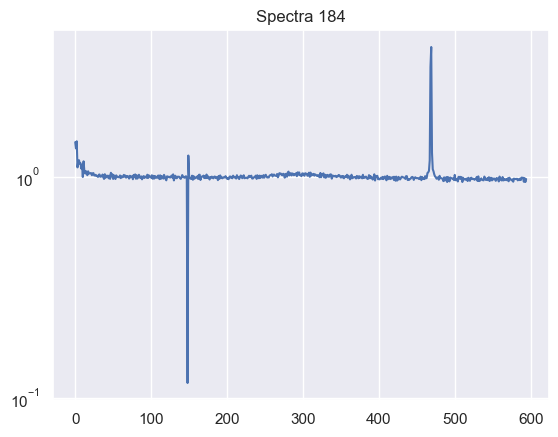

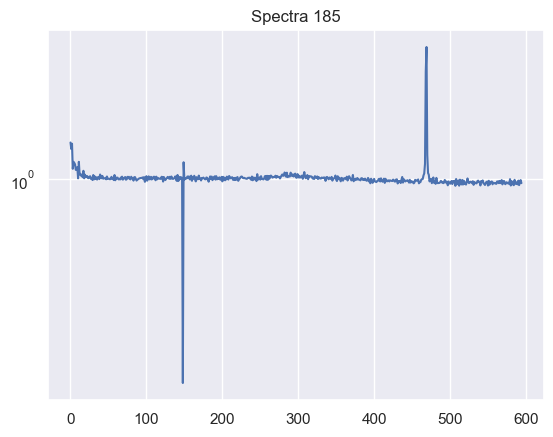

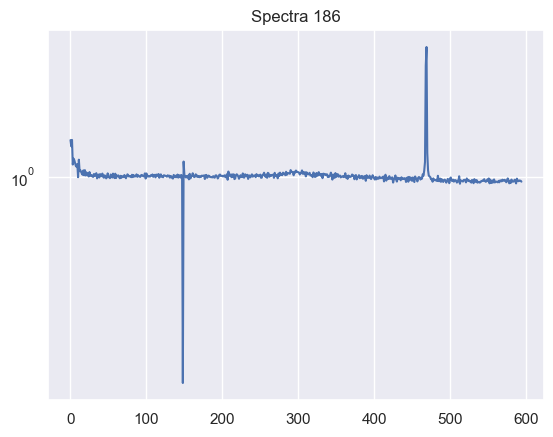

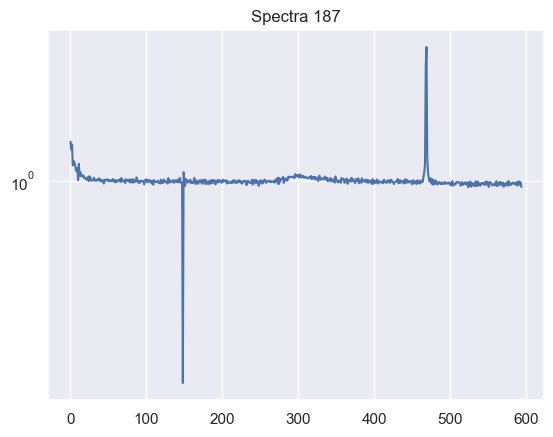

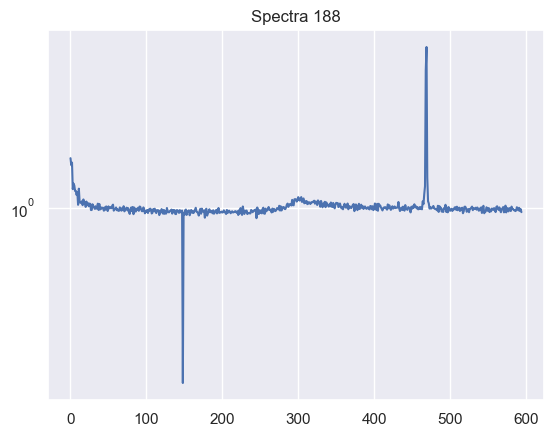

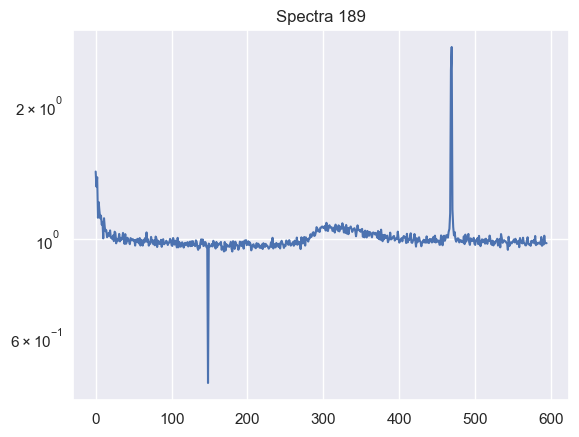

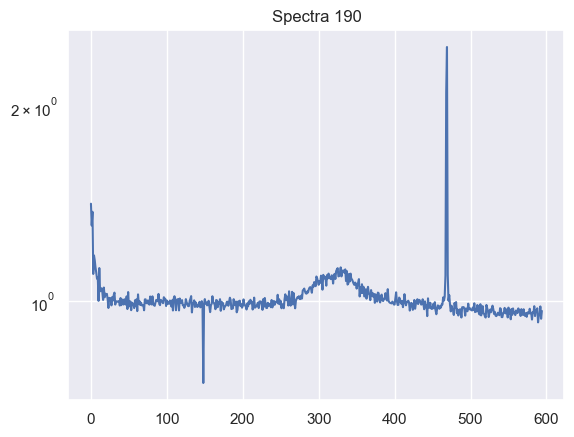

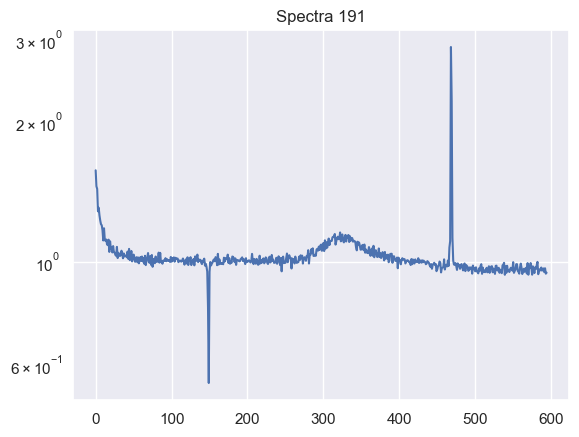

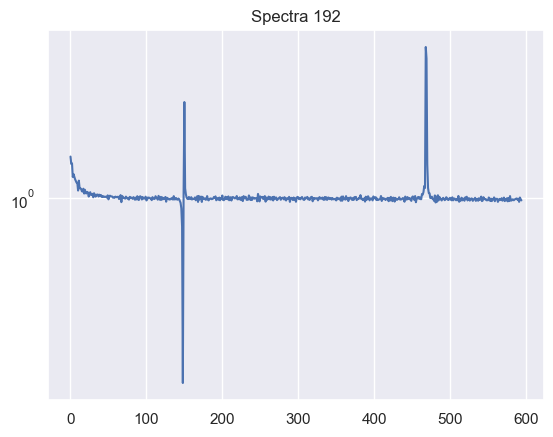

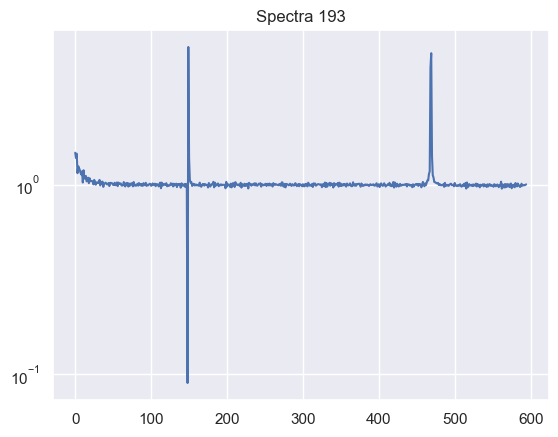

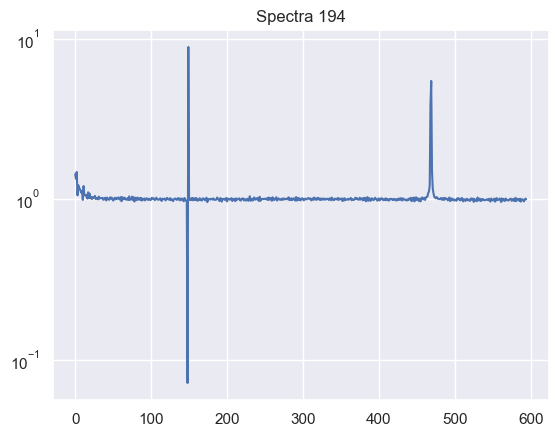

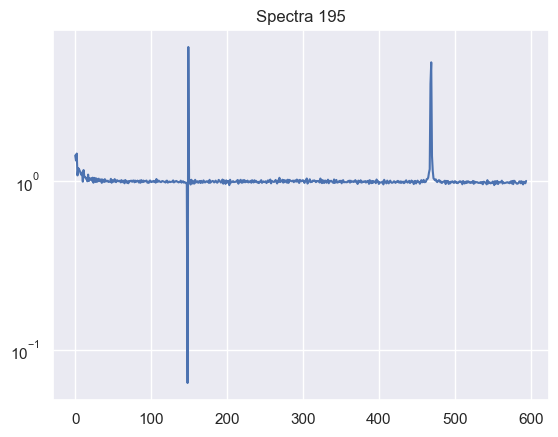

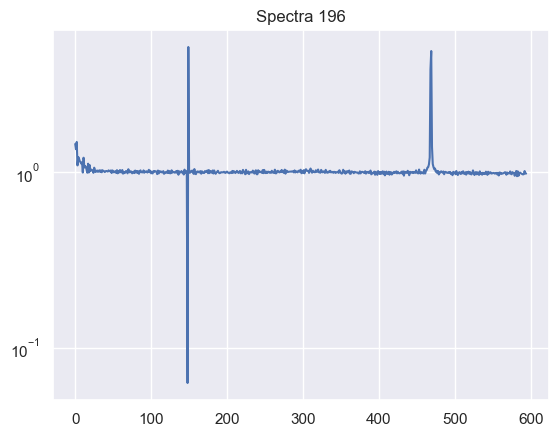

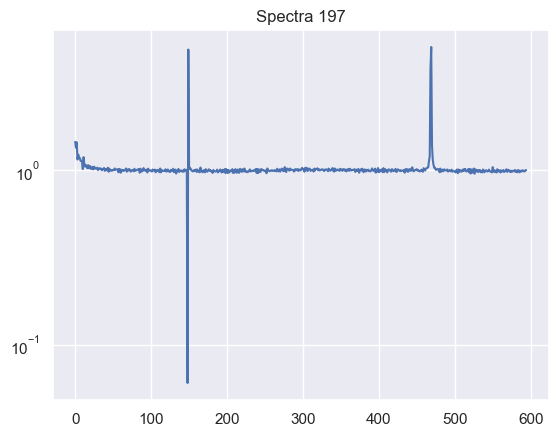

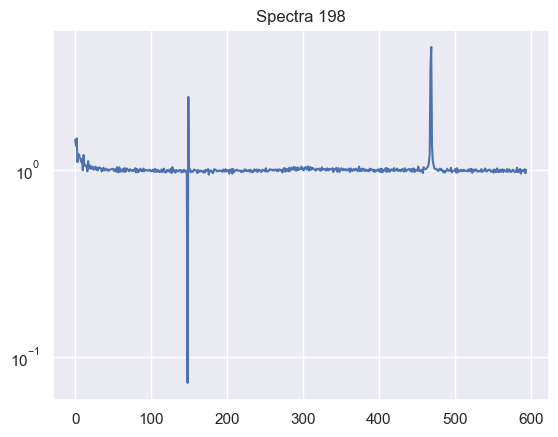

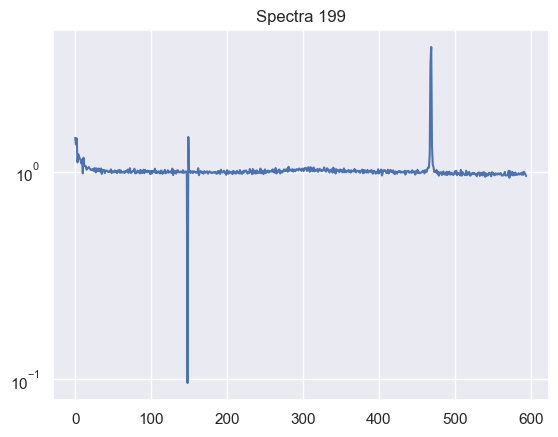

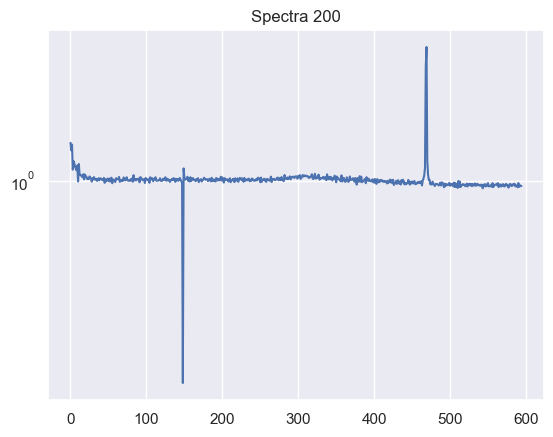

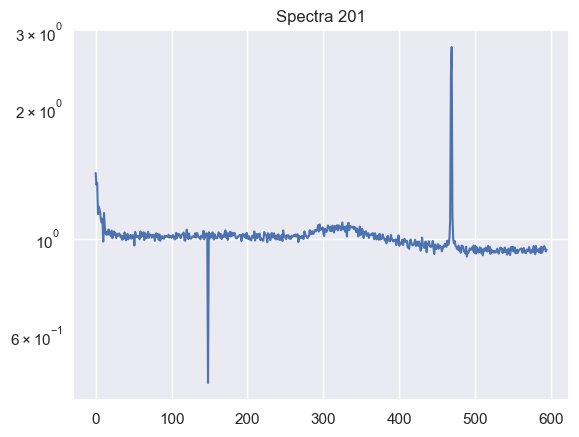

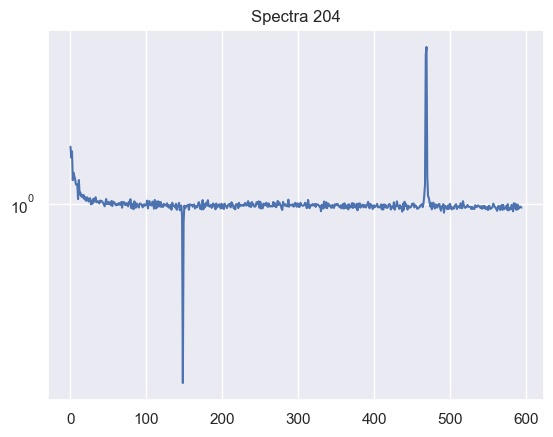

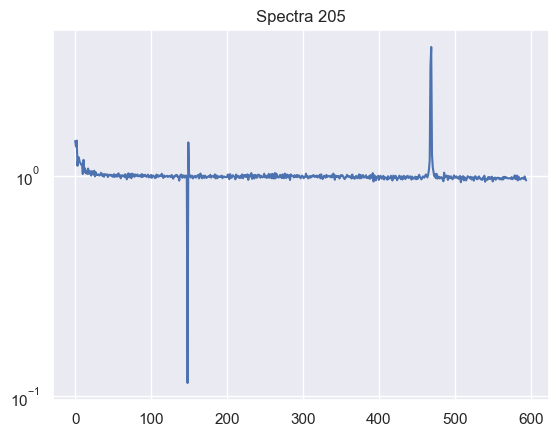

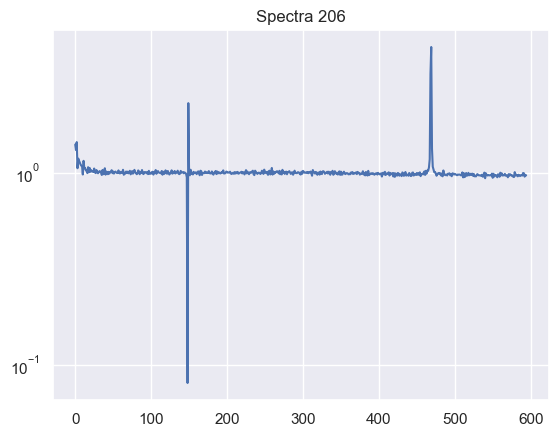

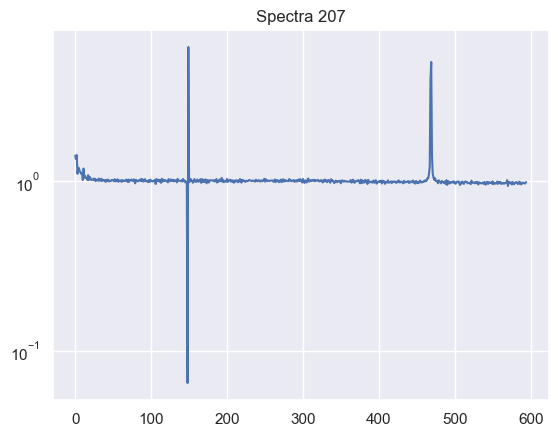

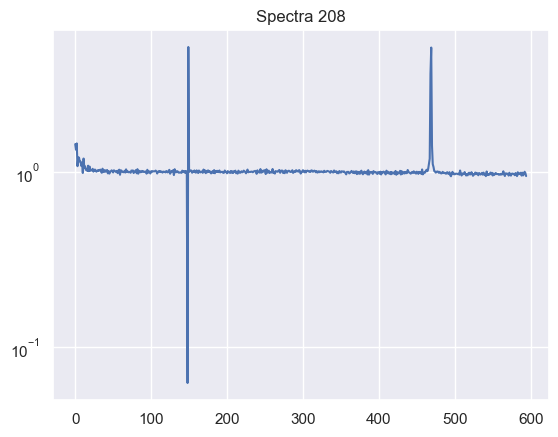

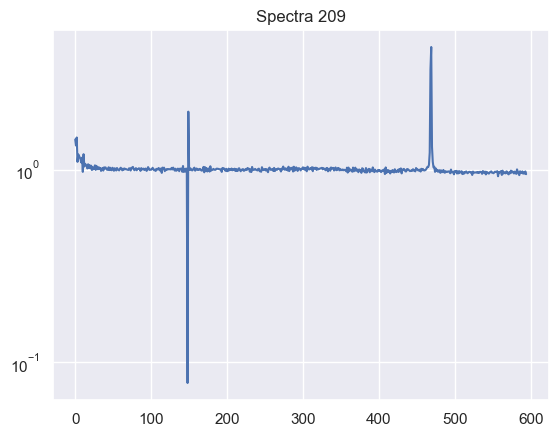

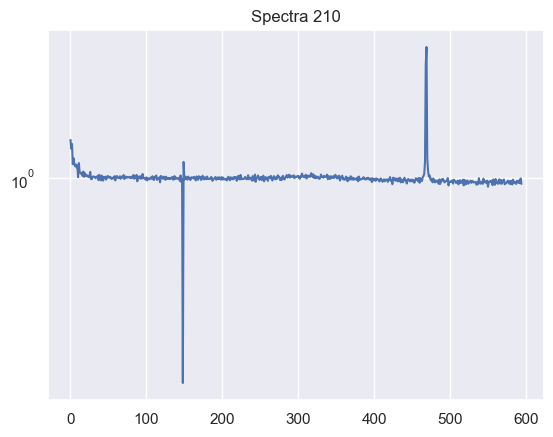

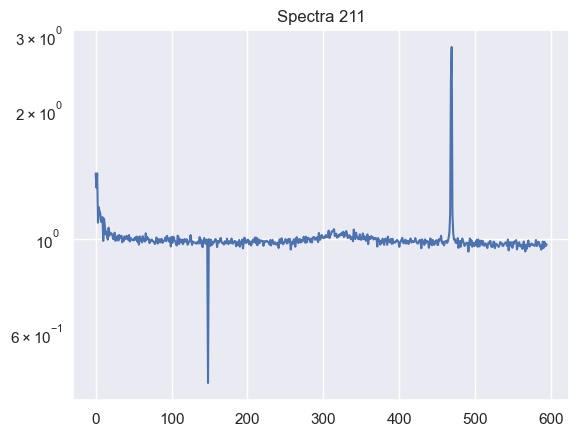

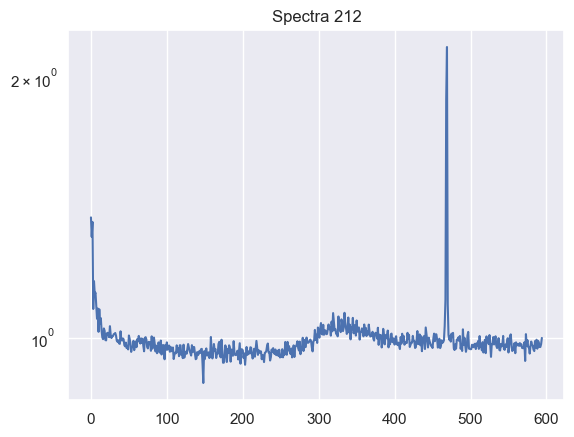

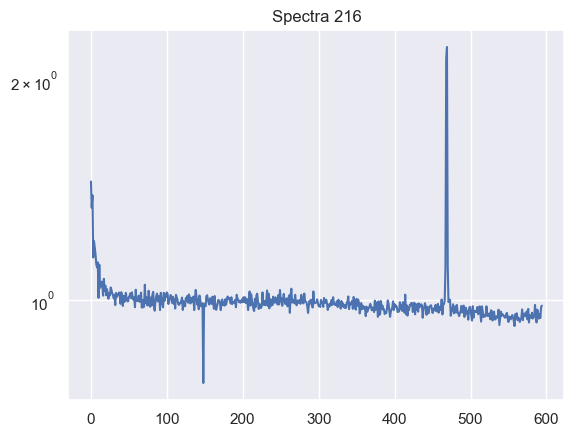

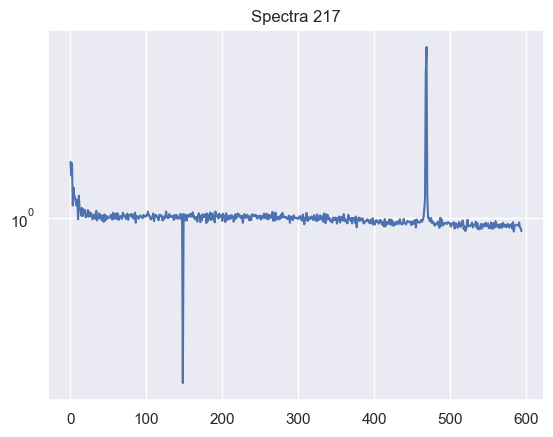

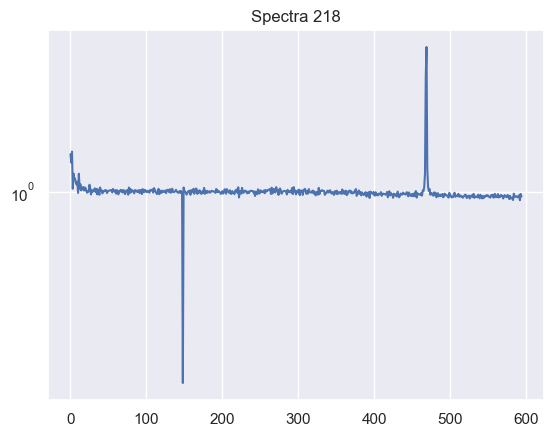

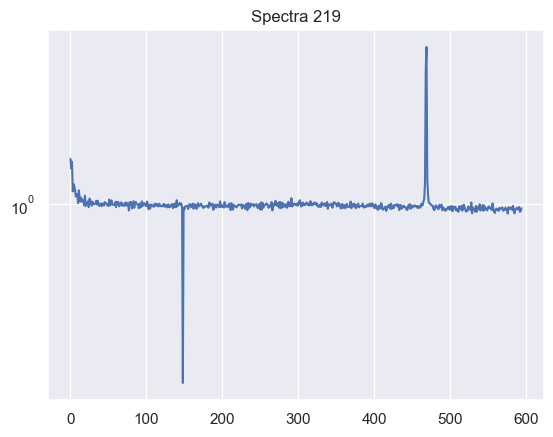

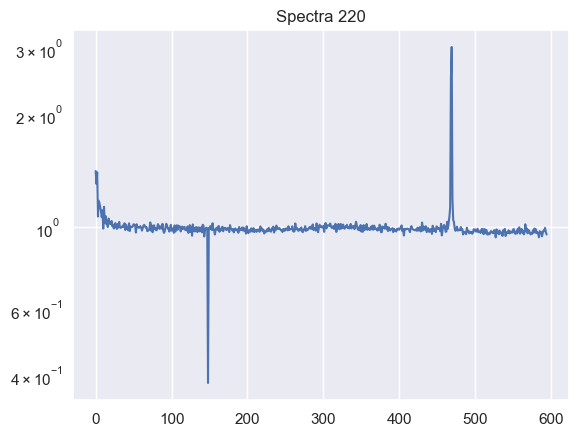

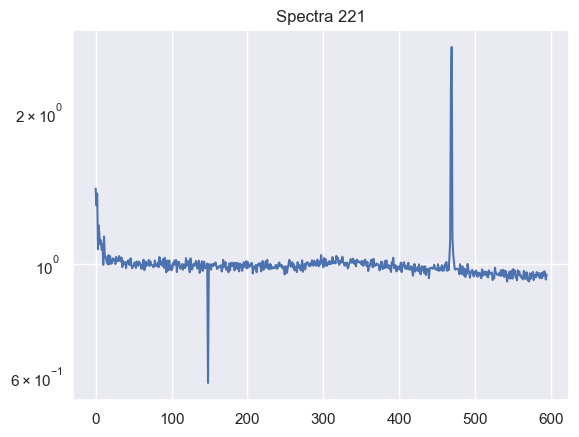

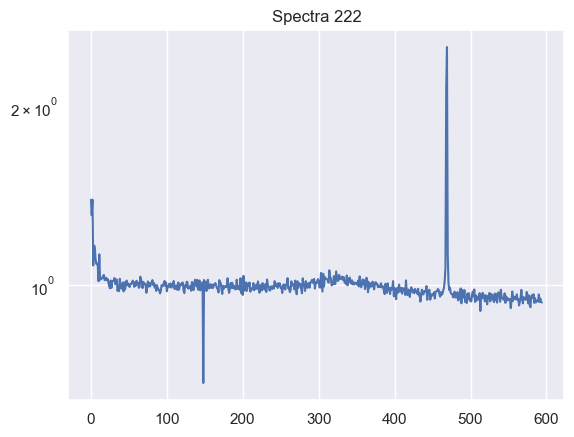

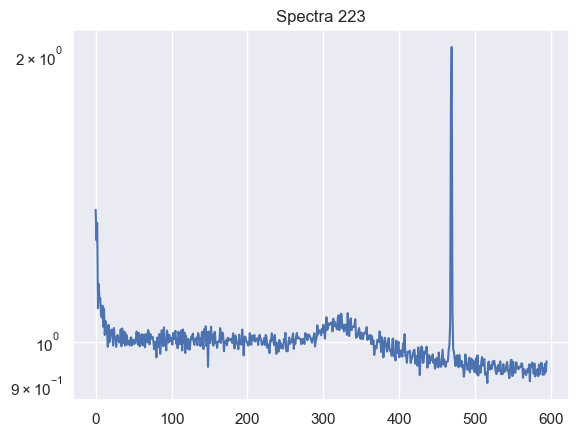

In [260]:

for fucked in fucked_spectra:
    plt.figure()
    plt.semilogy(chunked0[fucked])
    plt.title(f'Spectra {fucked}'.format(str))

In [ ]:
plt.semi

## HAHA NO. THOSE ARE NOT THE CLOUDS. 
### That's just some annoying ass peaks that showed up in the collection. Yeah, looks like we're gonna have to retake those. FML HAHA

OKAY: maybe we don't have to retake those. MAYBE we can just grab the power for those ones specialized to this situation. Those two peaks happen at pretty much the same spot in each spectra. So, can probably just index a smaller chunk of the chunk to grab the power max for those specific ones! I'm going home to put on pajamas, but scroll down to see how we can put these in a matrix, not sure exactly how to grid those once we have them... 

### Okay now goal is to put all of those peak values into a big matrix corresponding to their galactic position for mapping.

In [246]:
# because of how data was collected, the galactic coordinates are saved in the object "galactic"
print(len(galactic))
galactic
# and thankfully, because of the beginning, they are ordered exactly 
# the same as the spectra! 

313


[[60.0, 20.0],
 [60.0, 23.4],
 [60.0, 26.8],
 [60.0, 30.2],
 [60.0, 33.599999999999994],
 [60.0, 36.99999999999999],
 [60.0, 40.39999999999999],
 [60.0, 43.79999999999999],
 [60.0, 47.19999999999999],
 [60.0, 50.59999999999999],
 [60.0, 53.99999999999999],
 [60.0, 57.399999999999984],
 [64.6, 20.0],
 [64.6, 23.4],
 [64.6, 26.8],
 [64.6, 30.2],
 [64.6, 33.599999999999994],
 [64.6, 36.99999999999999],
 [64.6, 40.39999999999999],
 [64.6, 43.79999999999999],
 [64.6, 47.19999999999999],
 [64.6, 50.59999999999999],
 [64.6, 53.99999999999999],
 [64.6, 57.399999999999984],
 [69.19999999999999, 20.0],
 [69.19999999999999, 23.4],
 [69.19999999999999, 26.8],
 [69.19999999999999, 30.2],
 [69.19999999999999, 33.599999999999994],
 [69.19999999999999, 36.99999999999999],
 [69.19999999999999, 40.39999999999999],
 [69.19999999999999, 43.79999999999999],
 [69.19999999999999, 47.19999999999999],
 [69.19999999999999, 50.59999999999999],
 [69.19999999999999, 53.99999999999999],
 [69.19999999999999, 57.3999

In [247]:
# so make combined array pulling peak value and assigning to coordinates

combined_array = []
for i in range(len(galactic)):
    combined = [galactic[i], peaks_array[i]]
    combined_array.append(combined)
    
    

In [249]:
combined_array

[[[60.0, 20.0], 1.2423989087322675],
 [[60.0, 23.4], 1.1436405495278679],
 [[60.0, 26.8], 1.1194064198158558],
 [[60.0, 30.2], 1.123765981091869],
 [[60.0, 33.599999999999994], 1.1281185826581428],
 [[60.0, 36.99999999999999], 1.1212717447784728],
 [[60.0, 40.39999999999999], 1.15355323079509],
 [[60.0, 43.79999999999999], 1.1973870390832793],
 [[60.0, 47.19999999999999], 1.2363204436945407],
 [[60.0, 50.59999999999999], 1.2738565151918118],
 [[60.0, 53.99999999999999], 1.2293502596386296],
 [[60.0, 57.399999999999984], 1.3030010396870604],
 [[64.6, 20.0], 1.2206095704897753],
 [[64.6, 23.4], 1.1754201559598976],
 [[64.6, 26.8], 1.1697172797448177],
 [[64.6, 30.2], 1.1602763943370236],
 [[64.6, 33.599999999999994], 1.1303051009346947],
 [[64.6, 36.99999999999999], 1.1390249973096682],
 [[64.6, 40.39999999999999], 1.1649487668431964],
 [[64.6, 43.79999999999999], 1.1964218873231134],
 [[64.6, 47.19999999999999], 1.2371343844983356],
 [[64.6, 50.59999999999999], 1.3083555522578665],
 [[6

In [250]:
plt.imshow?

Signature:
plt.imshow(
    X,
    cmap=None,
    norm=None,
    *,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    interpolation_stage=None,
    filternorm=True,
    filterrad=4.0,
    resample=None,
    url=None,
    data=None,
    **kwargs,
)
Docstring:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image set up the colormapping using the parameters
``cmap='gray', vmin=0, vmax=255``.

The number of pixels used to render an image is set by the Axes size
and the *dpi* of the figure. This can lead to aliasing artifacts when
the image is resampled because the displayed image size will usually
not match the size of *X* (see
:doc:`/gallery/images_contours_and_fields/image_antialiasing`).
The resampling can be controlled via the *interpolation* parameter
and/or :rc:`imag